In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Fraud_check.csv")

In [3]:
data['Risk_Status'] = data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')


In [4]:
X = data.drop(columns=['Taxable.Income', 'Risk_Status'])
y = data['Risk_Status']


In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy  :", accuracy_score(y_test, y_pred))

Training Accuracy : 1.0
Testing Accuracy  : 0.6166666666666667


In [11]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[102  41]
 [ 28   9]]


In [12]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        Good       0.78      0.71      0.75       143
       Risky       0.18      0.24      0.21        37

    accuracy                           0.62       180
   macro avg       0.48      0.48      0.48       180
weighted avg       0.66      0.62      0.64       180



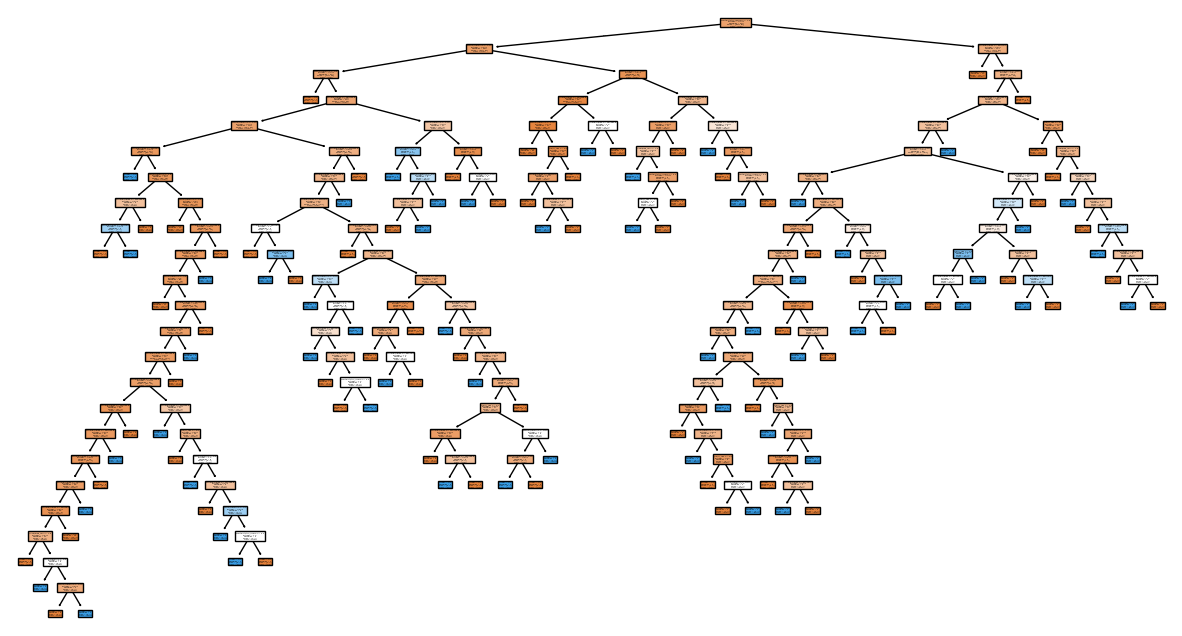

In [13]:
plt.figure(figsize=(15,8))
plot_tree(model, feature_names=X.columns, class_names=['Risky', 'Good'], filled=True)
plt.show()